# The tip of the iceberg or Automatic for the people

**MOD510 - Project 1 G05**   
- Jing Hou
- Parthasarathi Jena

### Abstract: (is it accurate and informative)

### Introduction : (status of problem and major objectives)

In [62]:
# load libraries
import sys
import numpy as np
import math
import matplotlib.pyplot as plt

## Exercise 1: Finite-precision arithmetic
**Part 1**. Run the following code snippet:
- Explain the meaning of the printed-out numbers

In [1]:
import sys
sys.float_info

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

This code provides the detailed information about float point numbers in 64-bit double-precision.

max: the maximum floating point value that it can represent  
max_exp: the maximum exponent of 2 that can be represented  
max_10_exp: the maximum exponent of 10 that can be represented  
min: the minimum floating point value that it can represent  
min_exp:  the minimum exponent of 2 that can be represented  
min_10_exp:the minimum exponent of 10 that can be represented  
dig: maximum number of decimal digits that can be represented in a float  
mant_dig: is maximum of significand including 1 bit of implicit value and 52 bits of fraction that can be represented  
epsilon: is machine precision that smallest relative approximation error due to floating point arithmetic.  
radix: 	the base of exponent representation
rounds: the rounding mode used for arithmetic operations.  

**Part 2**. Show how you can calculate the printed-out values max, min, epsilon yourself (again, based on the IEEE standard).

IEEE 754 double-precision binary floating-pint format: float64

Sign bit = 1 bit
Exponent = 11 bits
significand precision = 53 bits (52 explicitly stored)

manual calculation shown as below:
- max: $(2-2^{-52})2^{1023}= 1.7976931348623157*10^{308}$
- min: $2^{-1022}= 2.2250738585072014*10^{-308}$
- epsilon= $2^{-52} = 2.220446049250313*10^{-16}$

**Part 3**. In Python, typing 0.1+0.2 does not (typically) produce the same output as 0.3. Why not?

In [5]:
a = 0.1 + 0.2
a == 0.3

False

That is due to binary system the computer use where the numbers are converting from decimal into the binary first. Both 0.1 and 0.2 (1/10 and 1/5 )are not representable in binary since floating-point numbers in computers are represented with finite numbers of bits. It then ends up with tiny precision errors

**Part 4**. Should you use the == operator to test whether two floating-point numbers are equal? Why / why not? Can you think of alternative ways to do floating-point number comparison?

No, you should avoid using this operator for testing two floating-point numbers are equal. Similarly to the problem above, the two floating numbers may not be representable in binary floating format in computer as the computer has finite numbers of bits to represent floating-point values and it may lead to tiny errors.

Alternative way is to check if the difference between two floating-point numbers is very small and close rather than checking for exact equality. The proposed of options are shown as below: 
 
 1. define equality function that check floating-point numbers are close enough so round-off errors become irrelevant  
 2. Use math.isclose function  
 

In [111]:
# 1. define equality function that check floating-point numbers are close enough
epsilon = 2**-52

def is_close(a, b):
    return abs(a - b) < epsilon

a = 0.1 + 0.2
b = 0.3

print(is_close(a,b))

True


In [108]:
# 2. Use math.isclose function  
math.isclose (a,b)

True

## Exercise 2: Get up to speed with NumPy

**Part 1**. The following code block gives an example of a vectorized function:

Notice the usage of np.exp instead of using the exponential function provided in the built-in math library; this is an example of a universal function.  
- Create a native Python list of the same size as x and holding the same values. Apply the same two function calls to the list. Explain what happens.
- How would you generally evaluate a function on all elements of a native Python list? (as opposed to a NumPy array)


In [119]:
x = np.linspace(0, 1, 10)
print(x)
print(np.exp(x)) # Apply f(t)=exp(t) to each element in the array x.
print(np.exp(-x)) # Apply the function f(t)=exp(-t) to each element of x.

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
[1.         1.11751907 1.24884887 1.39561243 1.5596235  1.742909
 1.94773404 2.17662993 2.43242545 2.71828183]
[1.         0.89483932 0.8007374  0.71653131 0.64118039 0.57375342
 0.51341712 0.45942582 0.41111229 0.36787944]


In [85]:
# use native python list for the same output
x1 = [i/9 for i in range(10)]
print(x1)

x2 = [math.exp(i) for i in x1]
print(x2)

x3 = [math.exp(-i) for i in x1]
print(x3)


[0.0, 0.1111111111111111, 0.2222222222222222, 0.3333333333333333, 0.4444444444444444, 0.5555555555555556, 0.6666666666666666, 0.7777777777777778, 0.8888888888888888, 1.0]
[1.0, 1.1175190687418637, 1.2488488690016821, 1.3956124250860895, 1.5596234976067807, 1.7429089986334578, 1.9477340410546757, 2.1766299317162483, 2.4324254542872077, 2.718281828459045]
[1.0, 0.8948393168143698, 0.8007374029168081, 0.7165313105737893, 0.6411803884299546, 0.5737534207374327, 0.513417119032592, 0.45942582403592663, 0.41111229050718745, 0.36787944117144233]


**Part 2**. As already hinted at, the NumPy library comes with a plethora of useful features and functions. The code snippets below show some examples:  
- Explain what each line of code does.
- How would you produce the same output using native Python lists?

In [69]:
print(np.zeros(20))
print(np.ones(20))
print(np.linspace(0, 10, 11))
print(np.linspace(0, 10, 11, endpoint=False))
vector = np.arange(5) + 1
print(vector)#
print(2*vector)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[0.         0.90909091 1.81818182 2.72727273 3.63636364 4.54545455
 5.45454545 6.36363636 7.27272727 8.18181818 9.09090909]
[1 2 3 4 5]
[ 2  4  6  8 10]


The code by using numpy library gives us the output such below:

- array with 20 elements equal to zero   
- array with 20 elements equal to one  
- array with evenly spaced 11 elements in the range of 0 and 10, with the endpoint value in the range is included  
- array with evenly spaced 11 elements in the range of 0 and 10, with the endpoint value in the range is not included  
- array in the range of 0 and 5, add up 1 respectively  
- array with vector get multiplied by 2  

The same output by using native Python list is shown as below:



In [127]:
print([0 for i in range(20)])
print([1 for i in range(20)])
print([i for i in range(11)])
print([i/11*10 for i in range(11)])
print([i for i in range(1,6)])
print([i*2 for i in range(1,6)])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[0.0, 0.9090909090909092, 1.8181818181818183, 2.727272727272727, 3.6363636363636367, 4.545454545454545, 5.454545454545454, 6.363636363636363, 7.272727272727273, 8.181818181818182, 9.09090909090909]
[1, 2, 3, 4, 5]
[2, 4, 6, 8, 10]


**Part 3**. Frequently you will want to extract a subset of values from an array based on some kind of criterion. For example, you might want to count the number of non-zero numbers, or identify all values exceeding a certain threshold. With NumPy, such tasks are easily achieved using boolean masking, e.g.

In [120]:
array_of_numbers = np.array([4, 8, 15, 16, 23, 42,0,5])
nnz = np.count_nonzero(array_of_numbers)
print(f'There are {nnz} non-zero numbers in the array.')
is_even = (array_of_numbers % 2 == 0)
is_greater_than_17 = (array_of_numbers > 17)
is_even_and_greater_than_17 = is_even & is_greater_than_17

There are 7 non-zero numbers in the array.


However, neither of the following codes lines will execute:    

- Explain why this code fails
- Use np.logical_and to make the code work

In [130]:
#error on executing the following codes 
#is_even_and_greater_than_17 = is_even and is_greater_than_17
#print(array_of_numbers % 2 == 0 & array_of_numbers > 17)

In [144]:
# suggested solutions
is_even_and_greater_than_17 = is_even & is_greater_than_17
print(is_even_and_greater_than_17)
print(((array_of_numbers % 2) == 0) & (array_of_numbers > 17)) 
print(np.logical_and((array_of_numbers % 2 == 0),(array_of_numbers > 17)))


[False False False False False  True False False]
[False False False False False  True False False]
[False False False False False  True False False]


The failure on this first part is due to the input is array structure and it happens when using logical operator AND on numpy array. and Bit-wise operator works fine is because numpy overloads the & operator to perform element-wise bitwise AND on arrays.

The second error is due to the operators precedence and orders issues. when we use bitwise operator & it will have lower precedence. It will be fixed when we add parentheses to group the input or use np.logical_and

**Part 4**. The function np.where can also be used to select elements from an array.
- Explain the output of the following two lines of code:

In [147]:
np.where(array_of_numbers > 17)[0]
#it returns the index of the array where the condition is satisfied

array([4, 5], dtype=int64)

In [148]:
np.where(array_of_numbers > 17, 1, 0)
# it returns with an array where 1 condition is true and 0 where condition is false

array([0, 0, 0, 0, 1, 1, 0, 0])

## Exercise 3, Part I: Finite Differences (FD) with Functions

In scientific computing one often needs to calculate derivatives of functions. For problems encountered in practice, exact formulas may not be available, in which case numerical estimates are needed. However, to evaluate the correctness of our programmed numerical methods, it is still a very good idea to test the code on simple functions where the derivative is known. In this exercise, we consider a function that is relevant for describing wave phenomenona: $f(x) = sin(bx) · e^{−ax2}$ One way to implement the function in Python is:

In [152]:
def f(x, a=0.1, b=10):
    return np.sin(b*x)*np.exp(-a*x*x)

We have chosen to define a and b as default arguments, which allows us to evaluate the function at x = 1 by simply typing f(1); this is equivalent to the command f(1, 0.1, 10). If you want to change the b parameter, you can do, e.g., f(1, b=2). Note also that the function works both when x is a single number and when it is a Numpy array. This is because we use the Numpy versions of the sine (np.sin) and exponential (np.exp) functions. We will exploit this property of Python several times during this project.  

**Part 1**. It is always a good idea to start by visualizing the function in a plot.
- Make a Python function that plots f(x) from equation (1) over an arbitrary closed interval.
- Use the function to plot f(x) in the range [−10, 10]. Try to make your figure similar to the one shown in figure 1

In [252]:
def plot_func(f,start,end):
    
    dx= 0.01 # step size
    N = int((end-start)/dx) # number of points
    x = np.linspace(start, end, N)
    y = f(x)
    
    plt.plot(x,f(x),label='a Gaussian \nwave packet')
    plt.legend()
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Figure 1: A plot of $f(x)$')
    

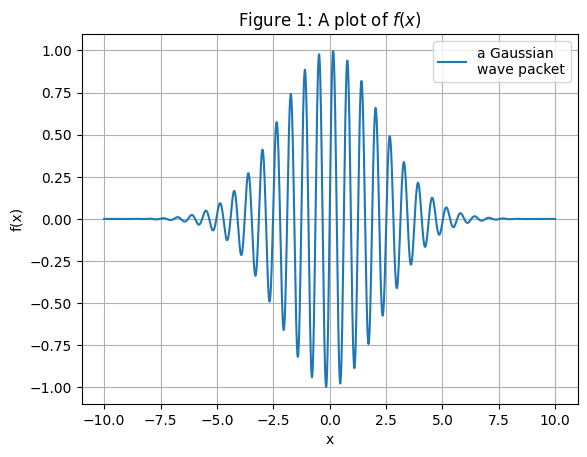

In [253]:
plot_func(f,-10,10)

**Part 2**. The analytical derivative of f(x) is $f'(x) = b cos(bx) · e^{−ax2} − 2ax sin(bx) · e^{−ax2}$  
- Write a Python function that calculates the derivative defined in equation (not the numerical derivative)

In [255]:
def analytical_der(x, a=0.1, b=10):
    return b*np.cos(b*x)*np.exp(-a*x*x)- 2*a*x*np.sin(b*x)*np.exp(-a*x*x)

**Part 3**. Next, you are going to write a Python function that calculates the numerical derivative of an *arbitrary* single-variable function f at a point x using finite differences.  
- Write a Python function that calculates the derivative of an arbitrary function using the forward difference method (see section 3.3 in [3] ).

- Apply your function to the particular case of equation (1) and x = 1. Use a suitable value of h, e.g. $h = 1e − 2$, and check that your estimate agrees reasonably well with the analytical solution.

In [268]:
def forward_diff(f, x, h,*args):
    return (f(x+h,*args)-f(x,*args))/h

In [273]:
x = 1
h = 1e-2

estimate = forward_diff(f,x,h)
analytical_solution = analytical_der(x)

In [283]:
print(f'The given point x = {x}, h = {h}')
print('Numerical value:',estimate)
print(f'Analytical value: {analytical_solution}')
print(f'The difference of numerical value to the true analytical values is {np.abs(estimate-analytical_solution)}')
# Numerical derivative is close enough to analytical derivative, yet remain with slightly difference when h is not small enough

The given point x = 1, h = 0.01
Numerical value: -7.220096595246589
Analytical value: -7.493783027703379
The difference of numerical value to the true analytical values is 0.27368643245679003


**Part 4**.
- Write another Python function that calculates f'(x) with the central difference method (see section 3.4 in [3]).

In [285]:
def central_diff(f, x, h,*args):
    return 0.5*(f(x+h,*args)-f(x-h,*args))/h

**Part 5**. Next, we wish to quantify the error in our numerical derivative approximations for the point x = 1.  
- For each of the two derivative approximations to f'(1) (forward difference and central difference), make a scatter plot that shows the absolute error of the approximation on the y-axis versus the step size, h, on the x-axis. Include both error curves in the same figure. The step sizes should be varied logarithmically between $h = 10^{−16}$ and $h = 10^0 = 1$.
- Comment on what you observe in the figure you made. When is the numerical error smallest, and why? Is it what you expect from a theoretical
analysis using Taylor’s formula?

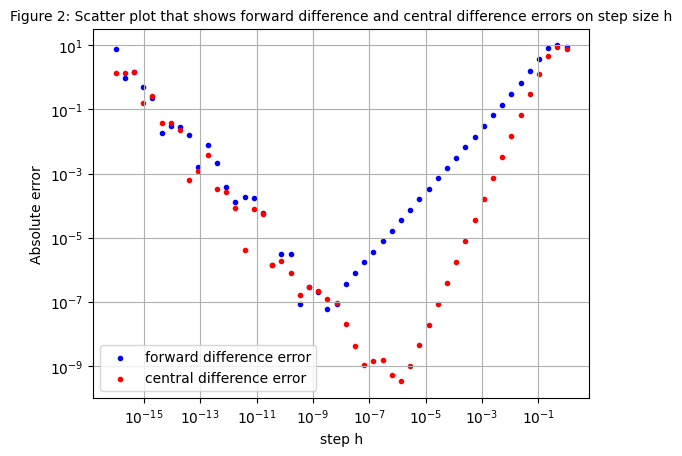

In [329]:
x = 1
h = np.logspace(-16,0) # step size

abs_error_forward = np.abs(forward_diff(f,x,h)- analytical_der(x))
abs_error_central = np.abs(central_diff(f,x,h)- analytical_der(x))

plt.scatter(h,abs_error_forward,label='forward difference error', c='b', marker='.')
plt.scatter(h,abs_error_central,label='central difference error', c='r', marker='.')
plt.legend()
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('step h')
plt.ylabel('Absolute error')
plt.title('Figure 2: Scatter plot that shows forward difference and central difference errors on step size h', fontsize =10)
plt.show()

In [ ]:

print(f"The minimum nummerical error for the forward difference method is {minimum_forward_value} when h = {h[minimum_forward_error]}")
print(f"The minimum nummerical error for the central difference method is {minimum_central_value} when h = {h[minimum_central_error]}")

## Exercise 3, Part II: FD with Classes

**Part 1**.
- Add a function (instance method) to the class that returns the forward difference approximation to the derivative of the function f at a point x. Include both x and the step-size h as input arguments to the function.  
- Add another second function which calculates the central difference approximation.

**Part 2**.
- Make a third class function that, for any input x, creates scatter plots showing the absolute error of the two finite difference approximations of f'(x) versus step size. As before, choose step sizes in the range from $10^{−16}$ to $1$ (with logarithmic spacing).
Hint: You should re-use the first two functions when making the third one.

## Exercise 4: A song of ice and fire?

## Exercise 5: Automatic for the people?

**Part 1**.
- add the following functions to your class, what happens when you do x+y? will allow you to get nice formatted output.

In [ ]:
def __repr__(self):
return "["+str(self.top)+","+str(self.bottom)+"]"
def __str__(self):
return "["+str(self.top)+","+str(self.bottom)+"]"

**Part 2**.In the code above we have implemented + operator, however if you try to execute +x or -x, Python will give an error message TypeError: bad operand type for unary -: ’duple’.
- Extend your code to make it possible to perform those operations. (Hint:check out __neg__ and __pos__ in the documentation)
- Implement the - operator using __sub__, test that if you do x-y you get[-2,-2]

**Part 3**.
- use the __mul__ function to implement the * operator, use normal multiplication for the top, and equation (11) for the bottom.
- use the __truediv__ function to implement the / operator, use normal division for the top, and equation (12) for the bottom.

**Part 4**. Finnish the code below

In [ ]:
class dfunction:
    def __init__(self, f, df):
        self.f = f
        self.df = df
    def __call__(self,d: duple): # kernel rule sending in and returning duple
        return duple(self.f(d.top), #fill inn kernel rule here!)

In [ ]:
def f(x):
    return np.log(x)
def df(x):
return 1/x
Log=dfunction(f,df) #note no arguments to f - we are passing the function
Exp=dfunction(np.exp,np.exp) # same here
print("auto diff ", Log(One+Exp(X)))
print("analytical ", np.log(1+np.exp(x)),np.exp(x)/(1+np.exp(x)))

**Part 5**.
- Write a few sentences about the use of automatic differentiation in some areas
- Make some comments about the strength and weaknesses of automatic differentiation compared to numerical differentiation

---------------

**Reflections**:
how did you work, what did you learn? what will you do differently next time? critical comments on the exercise itself. what did work and what did not work, and why?

**Conclusion**: what was learned about the methods used, and from the results obtained? possible directions and future improvements? 

**References**:  
1. [Information about sys float info 2023](https://note.nkmk.me/en/python-sys-float-info-max-min/#detailed-information-about-float-sysfloat_info)
2. [IEEE 754 - 1985](https://en.wikipedia.org/wiki/IEEE_754-1985)
3. [IEEE 754 standard](https://en.wikipedia.org/wiki/IEEE_754)
4.  Aksel Hiorth. *Computational Engineering and Modeling*. https://github.com/ahiorth/CompEngineering, 2023

additional points:  code quality, analysis